We will work with the [matplotlib](http://matplotlib.org/) module in get a 101 introduction on data visualizion as an approach of understanding data and representing certain aspects of it. We will use the [pyplot](http://matplotlib.org/api/pyplot_api.html) module that combines pyplot with numpy into a single namespace to provides a MATLAB-like plotting framework.

As in [ADM Laboratory on Population](../lab-population/ADM Lab - Population.ipynb) we work with the data provided by the [Open Data portal of the City of Rome](http://dati.comune.roma.it/). We use datasets related to registered population from other countries based on country of origin, sex and place of residence which is available for the years 2014, 2013 and 2012. For information on how to import the data from these datasets into a data structure that will support further studies, check out the [ADM Laboratory on Population](../lab-population/ADM Lab - Population.ipynb).

### Access Datasets, Store in local filesystem and Load Datasets in CSV format

We build upon the work done in [ADM Laboratory on Population](../lab-population/ADM Lab - Population.ipynb) and refactor the code that retrieves the dataset, loads the data into a list, and transforms the data. We create a function that makes this piece of code more modular.

In [15]:
import urllib.request
import csv

# Function to retrieve data from Open Data Portal of the City of Rome
# url: the location of the dataset (in CSV format) in the Open Data Portal
# localfile: the filename that will be used to store the file on the local disk
# header: the initial rows that do not include any data and should be excluded
# footer: the trailing rows that do not include any data and should be excluded
def loadDataRemote(url, localfile, header, footer):
    # connect and retrieve dataset
    u = urllib.request.urlopen(url)
    rawdata = u.read()    
    
    # store on local filesystem
    f = open(localfile, "wb")
    f.write(rawdata)
    f.close()    

    # load and prepare data structure
    return loadDataLocal(localfile, header, footer)

# Function to retrieve data from Open Data Portal of the City of Rome
# localfile: the filename of the dataset in CSV format
# header: the initial rows that do not include any data and should be excluded
# footer: the trailing rows that do not include any data and should be excluded
def loadDataLocal(localfile, header, footer):
    # load CSV data
    f = open(localfile)
    rawdata = []
    for row in csv.reader(f, delimiter=';'):
        rawdata.append(row)    
        
    # exclude header / footer
    dataset = rawdata[header: -footer]
    
    # convert text into number
    for row in dataset:
        for value in range(2, len(row)):
            row[value] = int(row[value].replace('.',''))    
            
    # dataset properly loaded
    return dataset

We can now use the new function to retrieve the three years by using one of the two functions.

#### Option A: Directly from the remote URLs

In [16]:
dataset2014 = loadDataRemote('http://dati.comune.roma.it/cms/do/jacms/Content/incrementDownload.action?contentId=DTS542&filename=popolazione_straniera_iscritta_in_anagrafe_per_municipio_e_sesso_e_cittadinanza_al_31_dicembre_20145ee4.csv',\
                             'rome-2014.csv', 5, 5)
dataset2013 = loadDataRemote('http://dati.comune.roma.it/cms/do/jacms/Content/incrementDownload.action?contentId=DTS725&filename=18-pop_stra_mun_cittad_1310ef.csv',\
                             'rome-2013.csv', 7, 5)
dataset2012 = loadDataRemote('http://dati.comune.roma.it/cms/do/jacms/Content/incrementDownload.action?contentId=DTS728&filename=18-pop_stra_mun_cittad_1292e6.csv',\
                             'rome-2012.csv', 7, 5)

#### Option B: From the local files

In [18]:
dataset2014 = loadDataLocal('rome-2014.csv', 5, 5)
dataset2013 = loadDataLocal('rome-2013.csv', 7, 5)
dataset2012 = loadDataLocal('rome-2012.csv', 7, 5)

#### Sort the data

We now sort the data to make sure that the entries as sorted based on the total population of each country of origin, in descending order. That is, the country with the most people registed in Rome will appear first.

In [20]:
dataset2014.sort(key=lambda x: x[len(x)-1], reverse=True)
dataset2013.sort(key=lambda x: x[len(x)-1], reverse=True)
dataset2012.sort(key=lambda x: x[len(x)-1], reverse=True)

### Prepare Simple Plots

We now create a simple plot that depicts the population per district for the country with the most people registered in Rome. Since the data is already sorted, this is the 1st entry of each table.

We first create an intermediate list containing only the values that we include in the plot. The values that we wish to include are the total (male and female) population of each district. Recall that all three datasets share the same format:
- Country of Origin (column 1)
- Continent (column 2)
- For each Municipio of Rome (the city is devided in 15 administrative regions) a breakdown
 * Males (M, starting from column 3)
 * Females (F, starting from column 4)
 * Total (MF, starting from column 5)
- The total population (over all administrative regions) divided in
 * Males (M)
 * Females (M)
 * Total (MF)
 
Based on the above structure, we look for the data located in rows 5, 8, ..., 46.

In [21]:
values = []
for x in range(0, 15):
    values.append(dataset2014[0][4+x*3])

Now we import the [matplotlib](http://matplotlib.org/) library and create a very simple plot using the intermediate list.

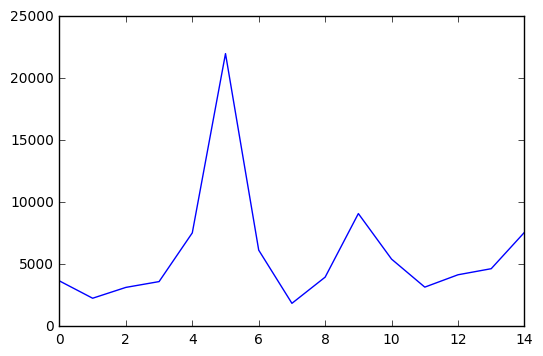

In [23]:
import matplotlib.pyplot as plt
plt.plot(values)
plt.show()

[matplotlib](http://matplotlib.org/) offers many methods to customize how the data are visualized, a [detailed tutorial](https://matplotlib.org/users/pyplot_tutorial.html) is available on the [official documentation website](https://matplotlib.org/api/pyplot_api.html).

Here, we just add a title, labels to axis and markers on the x axis (starting with 0 and not 1).

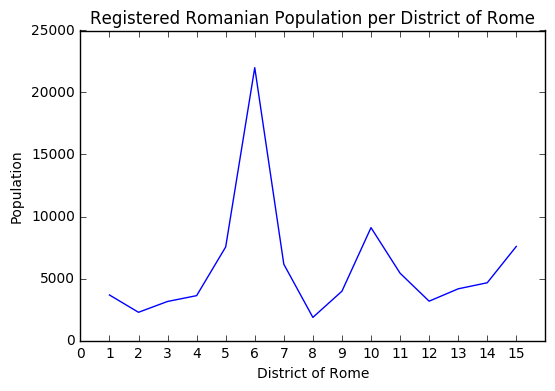

In [52]:
values = []
for x in range(0, 15):
    values.append(dataset2014[0][4+x*3])
    
plt.plot(values)
plt.title("Registered Romanian Population per District of Rome")
plt.xlabel("District of Rome")
plt.ylabel("Population")
plt.xticks(range(-1, 16), range(0,16))
plt.show()

matplotlib supports multiple plots on the same figure. We now extend the figure to include the top 5 countries. In this visualization we need to add labels to each plot and include a legend.

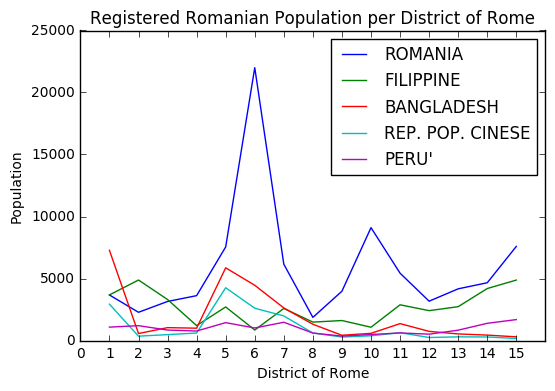

In [54]:
for country in range(0,5):
    values = []
    for x in range(0, 15):
        values.append(dataset2014[country][4+x*3])
        
    plt.plot(values, label = dataset2014[country][0])
    
plt.title("Registered Population per District of Rome")
plt.xlabel("District of Rome")
plt.ylabel("Population")
plt.xticks(range(-1, 16), range(0,16))
plt.legend()
plt.show()

In [ ]:
bar_width = 0.35
index = []
for x in range(1,16):
    index.append(x)
    
values = []
for x in range(0, 15):
    values.append(dataset2014[0][4+x*3])    

plt.bar(index, values, bar_width, color='b', label=dataset2014[0][0])

plt.xticks(index, range(1,16))    
plt.xlabel("Municipio di Roma")
plt.ylabel("Population")
plt.legend()
plt.show()